# Метрики эффективности моделей машинного обучения

# Содержание работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.1%20metrics/data/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = data["output"]
x = data.drop("output", axis=1)

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

x.shape, y.shape

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


((303, 13), (303,))

In [5]:
x_train, y_train = x[:200], y[:200]
x_train.shape, y_train.shape


((200, 13), (200,))

In [6]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

In [7]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.5436893203883495)

In [8]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [9]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8884297520661157, 0.6229508196721312)

In [10]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))

from numpy.random import shuffle

shuffle(mask)
mask

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True, False,

In [11]:
x_train = x[mask]
x_train.shape

(242, 13)

In [12]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [13]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.871900826446281, 0.8032786885245902)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

In [16]:
confusion_matrix(y_train, y_train_pred)

array([[ 85,  25],
       [  7, 125]])

In [17]:
confusion_matrix(y_test, y_test_pred)

array([[21,  7],
       [ 4, 29]])

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



In [19]:
precision_score(y_test, y_test_pred)

0.8055555555555556

In [20]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.867769,0.819672
Precision,0.833333,0.805556
Recall,0.946970,0.878788
F1,0.886525,0.840580


# Задание для самостоятельной работы

### 1. Повторите анализ для других видов моделей. Используйте 5-10 разных классов моделей. Подсчитывайте только метрики на тестовой выборке.

In [21]:
from sklearn.model_selection import train_test_split


data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.1%20metrics/data/heart.csv")

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [22]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, f1_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def fit_all_classifiers(X_train, y_train, X_test, y_test):
    model_arr = [
        make_pipeline(StandardScaler(), SVC()), # Метод опореных векторов без ядра 
        make_pipeline(StandardScaler(), SVC(kernel='linear')), # Метод опореных векторов с линейным ядром
        make_pipeline(StandardScaler(), SVC(kernel='rbf')), # Метод опореных векторов с гауссовым ядром
        make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3)), # Метод опореных векторов с полиномиальным ядром
        KNeighborsClassifier(n_neighbors=3), # Метод ближайших соседей
        MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), # Многослойный перцептрон
        DecisionTreeClassifier(max_depth=10, random_state=42), # Дерево решений
        GaussianNB(), # Наивный байесовский классификатор
        PassiveAggressiveClassifier(random_state=42), # Пассивно-агрессивный классификатор
        RidgeClassifier(), # Гребневый классификатор
        RandomForestClassifier(n_estimators=100, random_state=0), # Случайный лес
        BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0) # Беггинг
    ]

    model_names = [
        "SVM","SVM (linear)", "SVM (rbf)", "SVM (poly)",
        "KNN", "MLP", "Decision Tree",
        "Naive Bayes", "Passive-Aggressive", "Ridge", 
        "Random Forest", "Bagging"
    ]

    metrics = []

    fig, axs = plt.subplots(3, 4, figsize=(20, 12))
    axs = axs.flatten()

    for i, (model, name) in enumerate(zip(model_arr, model_names)):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        perscore = precision_score(y_test, y_pred, average='macro'),
        rescore = recall_score(y_test, y_pred, average='macro'),
        f1 = f1_score(y_test, y_pred, average='macro'),

        ConfusionMatrixDisplay(cm).plot(ax=axs[i])
        axs[i].set_title(f"{name}\nAccuracy: {acc:.2f}")
        
        metrics.append({"Model": name, "Accuracy": acc, "Precision": perscore[0], "Recall": rescore[0], "F1": f1[0]})
    
    for j in range(len(model_arr), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


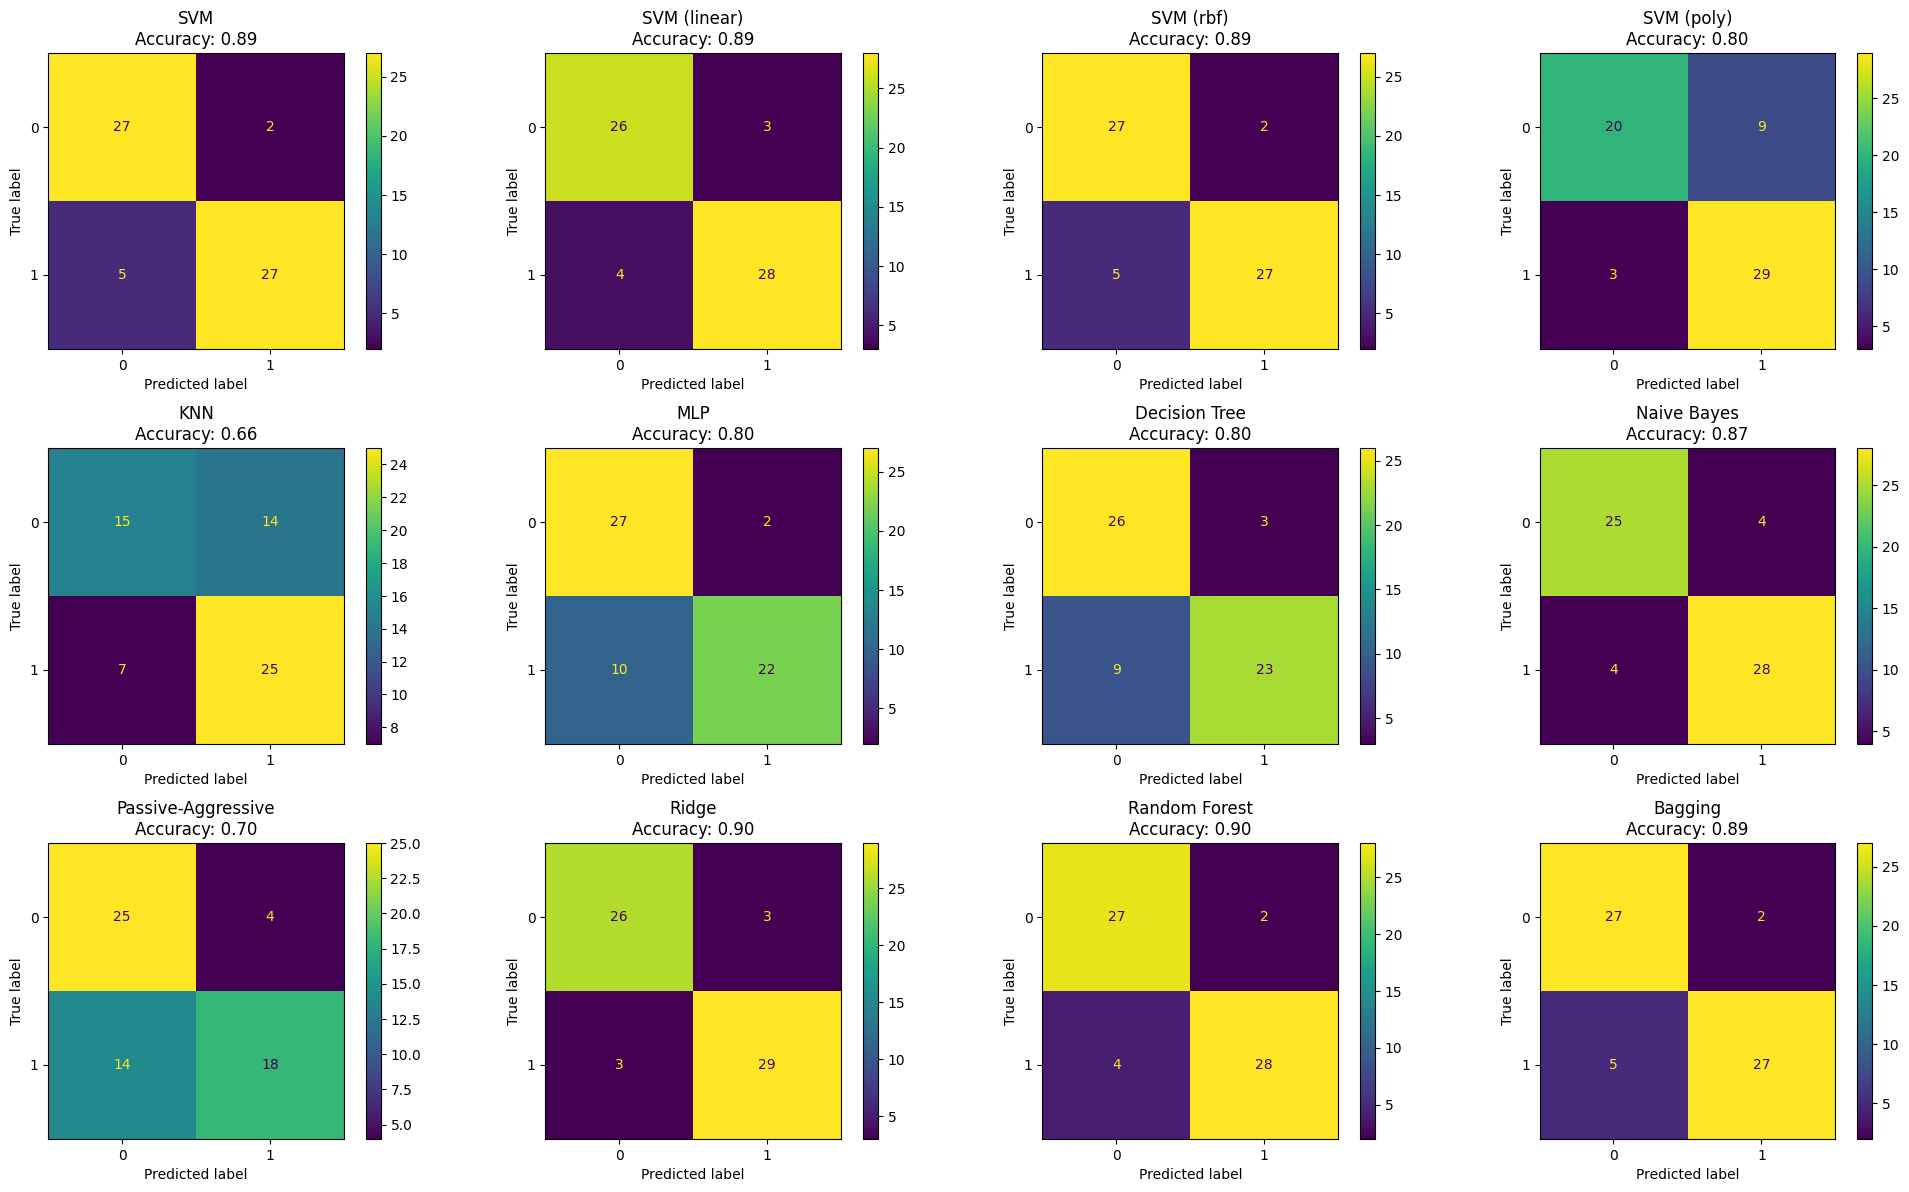

In [23]:
df_metrics = fit_all_classifiers(X_train, y_train, X_test, y_test)

In [24]:
df_metrics

,Model,Accuracy,Precision,Recall,F1
0,SVM,0.885246,0.887392,0.887392,0.885246
1,SVM (linear),0.885246,0.884946,0.885776,0.885122
2,SVM (rbf),0.885246,0.887392,0.887392,0.885246
3,SVM (poly),0.803279,0.816362,0.797953,0.798901
4,KNN,0.655738,0.661422,0.649246,0.646230
5,MLP,0.803279,0.823198,0.809267,0.801948
6,Decision Tree,0.803279,0.813736,0.807651,0.802802
7,Naive Bayes,0.868852,0.868534,0.868534,0.868534
8,Passive-Aggressive,0.704918,0.729604,0.712284,0.700980
9,Ridge,0.901639,0.901401,0.901401,0.901401


### 2. Повторите анализ для другого датасета по вашему выбору. Используйте несколько моделей для сравнения. Используйте датасет для множественной классификации.

In [25]:
from sklearn.datasets import load_wine


data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


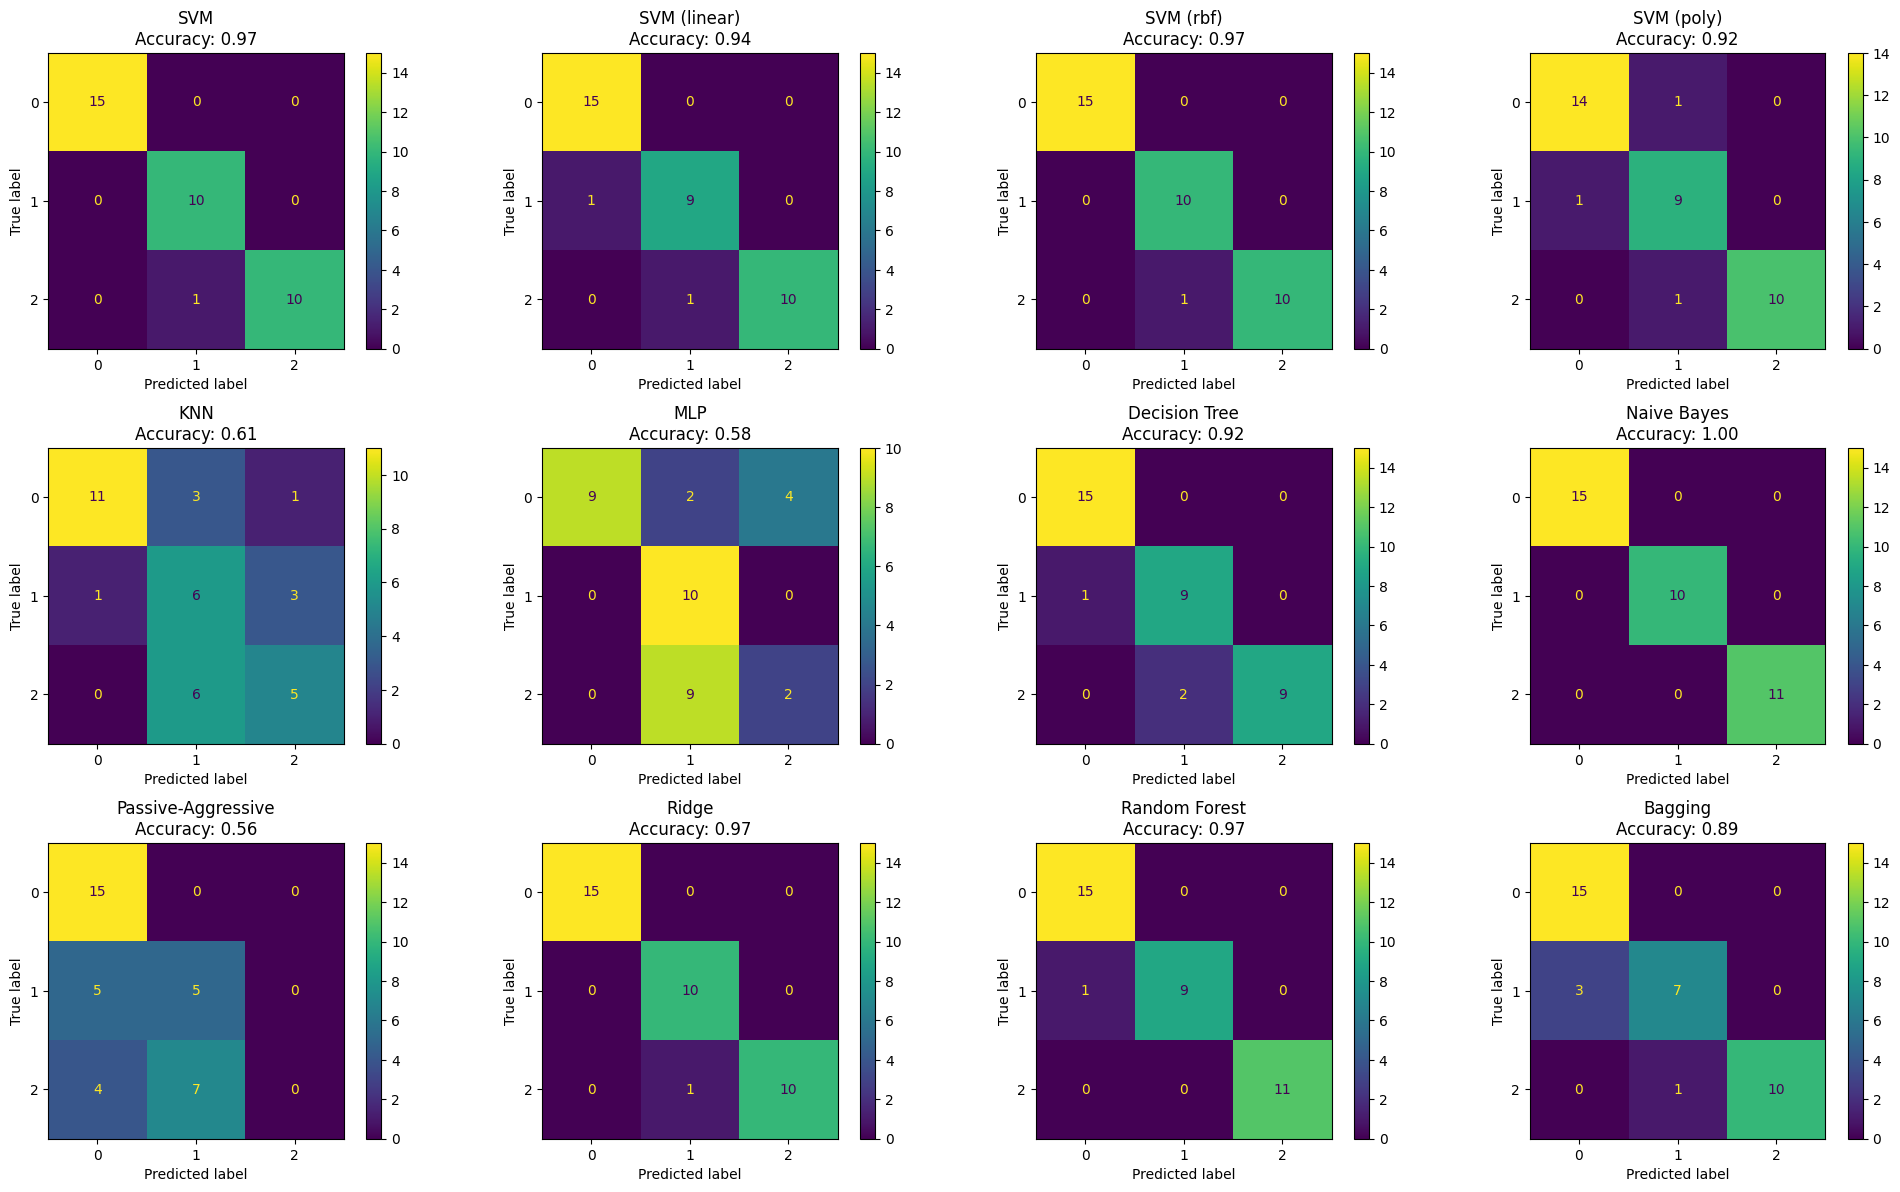

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

df_metrics = fit_all_classifiers(X_train, y_train, X_test, y_test)

In [27]:
df_metrics

,Model,Accuracy,Precision,Recall,F1
0,SVM,0.972222,0.969697,0.969697,0.968254
1,SVM (linear),0.944444,0.945833,0.936364,0.940041
2,SVM (rbf),0.972222,0.969697,0.969697,0.968254
3,SVM (poly),0.916667,0.917172,0.914141,0.914286
4,KNN,0.611111,0.624074,0.595960,0.598272
5,MLP,0.583333,0.603175,0.593939,0.543485
6,Decision Tree,0.916667,0.918561,0.906061,0.908295
7,Naive Bayes,1.000000,1.000000,1.000000,1.000000
8,Passive-Aggressive,0.555556,0.347222,0.500000,0.407925
9,Ridge,0.972222,0.969697,0.969697,0.968254


### 3. Повторите анализ для датасета, предназначенного для решения задачи регрессии. Используйте все метрики качества регрессии, изученные на лекции. Постройте 5 - 10 разных моделей регрессии.

In [28]:
from sklearn.datasets import load_diabetes


data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [30]:
from sklearn.model_selection import train_test_split


X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [38]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


def fit_all_models(X_train, y_train, X_test, y_test):
    model_arr = [make_pipeline(StandardScaler(), SVR()), 
                make_pipeline(StandardScaler(), SVR(kernel="rbf")), 
                make_pipeline(StandardScaler(), SVR(kernel="poly", degree=3)),
                KNeighborsRegressor(n_neighbors=3),
                MLPRegressor(hidden_layer_sizes=(100, 50),  
                            activation='relu',             
                            solver='adam',                 
                            max_iter=1000,                 
                            random_state=42),
                DecisionTreeRegressor(max_depth=10, random_state=42),
                Ridge(alpha=1),
                Lasso(alpha=0.1),
                ElasticNet(),
                RandomForestRegressor(n_estimators=100, random_state=0),
                BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)]


    fig, axs = plt.subplots(3, 4, figsize=(20, 12))
    axs = axs.flatten()

    metrics = []

    for i, (model, name) in enumerate(zip(model_arr, [
        "SVR", "SVR (rbf)", "SVR (poly)", "KNN", "MLP", "Decision Tree", 
        "Ridge", "Lasso", "ElasticNet", "Random Forest", "Bagging"
    ])):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = model.score(X_test, y_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        metrics.append({
            "Model": name,
            "R2": r2,
            "MAE": mae,
            "MSE": mse
        })

        axs[i].scatter(y_pred, y_test, alpha=0.6)
        axs[i].plot(y_test, y_test, color='red')
        axs[i].set_title(name)
        axs[i].set_xlabel("Predicted")
        axs[i].set_ylabel("Actual")

    for j in range(len(model_arr), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    metrics_df = pd.DataFrame(metrics)
    
    return metrics_df

        

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


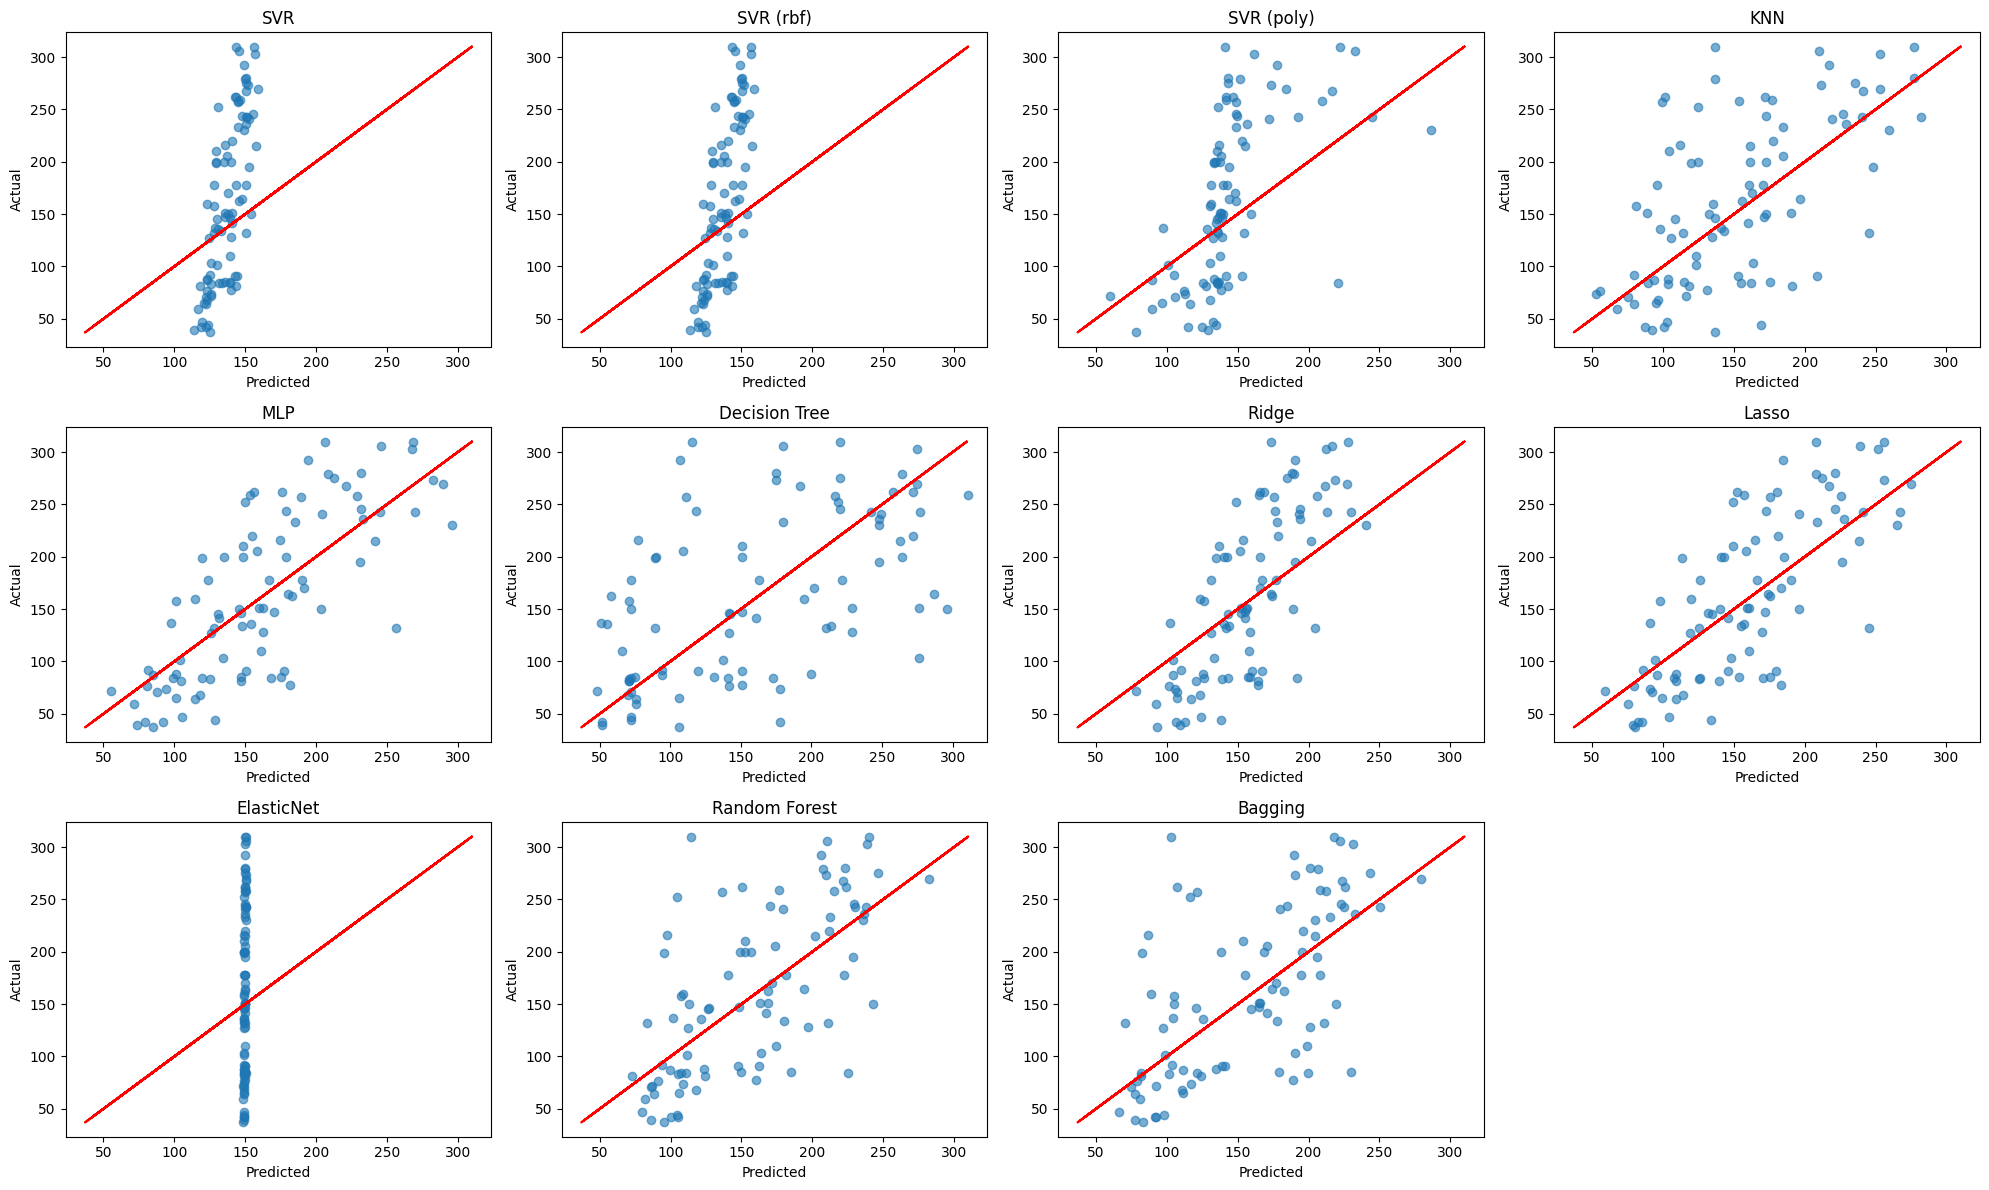

In [39]:
df_metrics =  fit_all_models(X_train, y_train, X_test, y_test)

In [33]:
df_metrics

,Model,R2,MAE,MSE
0,SVR,0.094197,63.095349,5688.384028
1,SVR (rbf),0.094197,63.095349,5688.384028
2,SVR (poly),0.259247,56.034527,4651.882227
3,KNN,0.351311,49.348315,4073.725343
4,MLP,0.574205,42.145660,2673.966052
5,Decision Tree,0.115051,57.750593,5557.418987
6,Ridge,0.474581,47.892913,3299.599505
7,Lasso,0.569224,42.584428,2705.246500
8,ElasticNet,-0.017368,68.028609,6389.000607
9,Random Forest,0.444037,46.687640,3491.411013


# Контрольные вопросы

**Почему для анализа модели нужно применять несколько метрик эффективности?**  
Одна метрика не даёт полной картины — например, высокая точность может скрывать дисбаланс классов, поэтому используют несколько метрик для комплексной оценки.

**Зачем для анализа качества модели делить датасет на обучающую и тренировочную выборки?**  
Чтобы оценить, как модель обобщается на новые данные, а не просто запомнила тренировочные примеры.

**В чем особенность и область применения каждой метрики качества?**  
MAE хорошо отражает среднюю ошибку в регрессии, MSE сильнее штрафует большие ошибки, R² показывает долю объяснённой дисперсии. В классификации точность важна при равных классах, precision — при высокой цене FP, recall — при высокой цене FN, F1 — при дисбалансе.

**Для каждой метрики классификации и регрессии придумайте пример, в котором данная метрика будет определяющей для выбора наилучшей модели.**  
Для recall — выявление заболевших (лучше ложно положить, чем пропустить), для precision — при блокировке мошенников (важно не блокировать честных), для MAE — оценка средней ошибки цен на жильё, для MSE — прогноз отклонений в технических системах, для R² — объяснение влияния факторов на доход.

**В каких случаях нельзя делить выборку случайным образом?**  
При наличии временной зависимости (time series) или при стратифицированной структуре классов, чтобы не нарушить их пропорции.

**Зачем нужен и как использовать отчет о классификации**  
Он показывает precision, recall, f1 и support по каждому классу; его используют для оценки сбалансированности модели и выявления слабых мест.
